In [4]:
import gym
import matplotlib.pyplot as plt
import pandas as pd
from gym import spaces
from sb3_contrib import TRPO
import seaborn as sns
import numpy as np

ModuleNotFoundError: No module named 'sb3_contrib'

In [2]:
class ObservationRAM(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
        # Observation space muss am Anfang festgelegt werden
        self.observation_space = spaces.Box(low=0, high=210, shape=(13, ))
        self.score = 0
        self.hit = 0

    def observation(self, obs):
        # Die Daten die benutzt werden (y, score, cooldown, auto x pos)
        obs = obs[[14, 103, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]].astype(float)

        if obs[2] == 141 or obs[2] == 141:
            self.score += 1
        obs[1] = self.score

        if 90 <= obs[2] <= 100:
            self.hit += 1

        # normalisieren
        obs[0] /= 176
        obs[2] /= 142
        for i in range(3, 13):
            obs[i] /= 160

        return obs

## 50 Spiele mit NN1

In [8]:
env = ObservationRAM(gym.make("ALE/Freeway-v5", obs_type="ram", render_mode="rgb_array", difficulty=1, mode=3))
model = TRPO.load("models/finished/model_NN1.zip", env=env)

obs = env.reset()

best_scores_nn1 = []
hits_nn1 = []

for _ in range(50):
    env = ObservationRAM(gym.make("ALE/Freeway-v5", obs_type="ram", render_mode="rgb_array", difficulty=1, mode=3))

    obs = env.reset()
    for _ in range(2048):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        #env.render()
        #time.sleep(0.00001)/
        if done:
            obs = env.reset()
    hits_nn1.append(env.hit)
    best_scores_nn1.append(env.score)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## 50 Spiele mit NN2

In [6]:
env = ObservationRAM(gym.make("ALE/Freeway-v5", obs_type="ram", render_mode="rgb_array", difficulty=1, mode=3))
model = TRPO.load("models/finished/model_NN2.zip", env=env)

obs = env.reset()

best_scores_nn2 = []
hits_nn2 = []

for _ in range(50):
    env = ObservationRAM(gym.make("ALE/Freeway-v5", obs_type="ram", render_mode="rgb_array", difficulty=1, mode=3))

    obs = env.reset()
    for _ in range(2048):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        #env.render()
        #time.sleep(0.00001)
        if done:
            obs = env.reset()
    hits_nn2.append(env.hit)
    best_scores_nn2.append(env.score)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## 50 Spiele mit NN5


In [5]:
env = ObservationRAM(gym.make("ALE/Freeway-v5", obs_type="ram", render_mode="rgb_array", difficulty=1, mode=3))
model = TRPO.load("models/finished/model_NN5.zip", env=env)

obs = env.reset()

best_scores_nn5 = []
hits_nn5 = []

for _ in range(50):
    env = ObservationRAM(gym.make("ALE/Freeway-v5", obs_type="ram", render_mode="rgb_array", difficulty=1, mode=3))

    obs = env.reset()
    for _ in range(2048):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        #env.render()
        #time.sleep(0.00001)
        if done:
            obs = env.reset()
    hits_nn5.append(env.hit)
    best_scores_nn5.append(env.score)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## 50 Spiele nur hoch laufen

In [7]:
env = ObservationRAM(gym.make("ALE/Freeway-v5", obs_type="ram", render_mode="rgb_array", difficulty=1, mode=3))

obs = env.reset()

best_scores_1 = []
hits_1 = []

for _ in range(50):
    env = ObservationRAM(gym.make("ALE/Freeway-v5", obs_type="ram", render_mode="rgb_array", difficulty=1, mode=3))

    obs = env.reset()
    for _ in range(2048):
        obs, reward, done, info = env.step(1)
        #env.render()
        #time.sleep(0.00001)
        if done:
            obs = env.reset()
    hits_1.append(env.hit)
    best_scores_1.append(env.score)

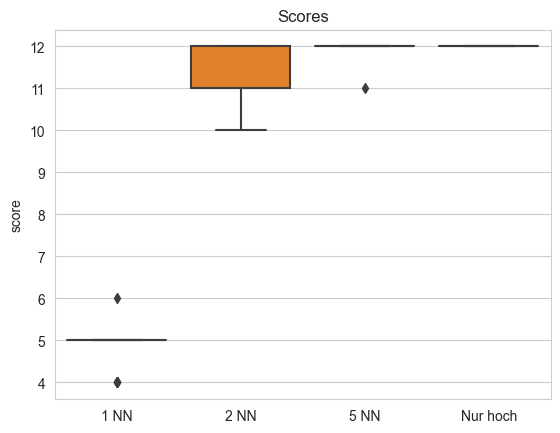

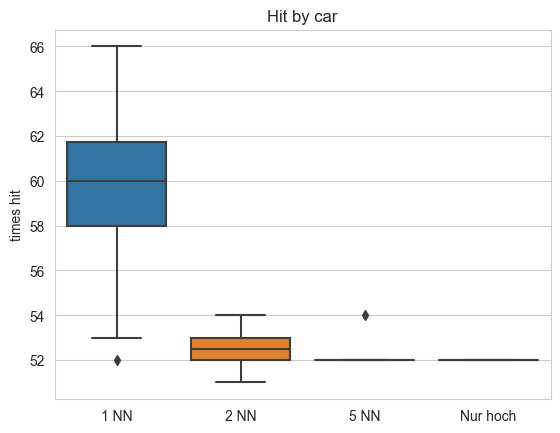

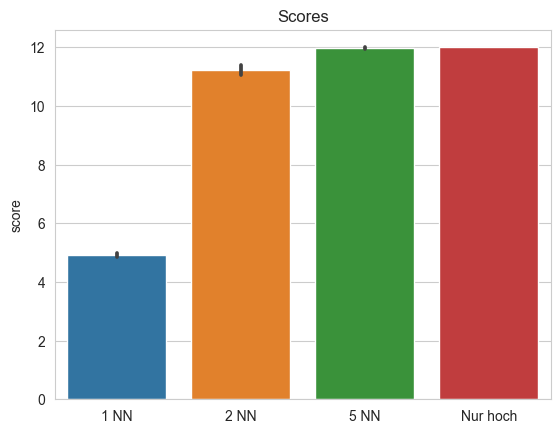

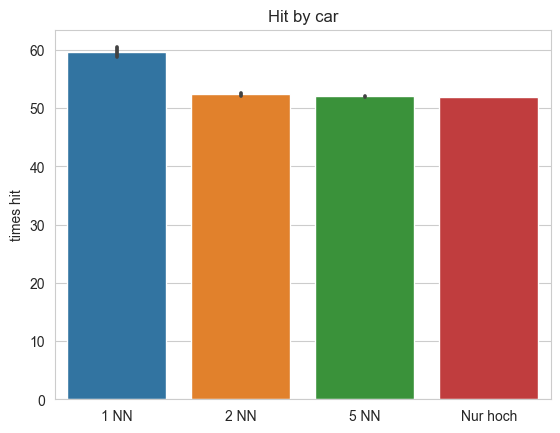

In [15]:
df_score = pd.DataFrame({
    "1 NN": best_scores_nn1,
    "2 NN": best_scores_nn2,
    "5 NN": best_scores_nn5,
    "Nur hoch": best_scores_1,
})

df_hit = pd.DataFrame({
    "1 NN": hits_nn1,
    "2 NN": hits_nn2,
    "5 NN": hits_nn5,
    "Nur hoch": hits_1,
})

sns.boxplot(df_score)
plt.title("Scores")
plt.ylabel("score")
plt.show()
sns.boxplot(df_hit)
plt.title("Hit by car")
plt.ylabel("times hit")
plt.show()
sns.barplot(df_score)
plt.title("Scores")
plt.ylabel("score")
plt.show()
sns.barplot(df_hit)
plt.title("Hit by car")
plt.ylabel("times hit")
plt.show()

In [17]:
print(min(best_scores_nn1))
print(max(best_scores_nn1))
print(np.array(best_scores_nn1).mean())

4
6
4.92


In [18]:
print(min(best_scores_nn2))
print(max(best_scores_nn2))
print(np.array(best_scores_nn2).mean())

10
12
11.22


In [19]:
print(min(best_scores_nn5))
print(max(best_scores_nn5))
print(np.array(best_scores_nn5).mean())

11
12
11.98
